In [4]:
import numpy as np 
import pandas as pd

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

df = pd.DataFrame({
    "X1": x1,
    "X2": x2,
    "Y": y
})

In [5]:
df.corr()

,X1,X2,Y
X1,1.000000,0.772324,0.530531
X2,0.772324,1.000000,0.471356
Y,0.530531,0.471356,1.000000


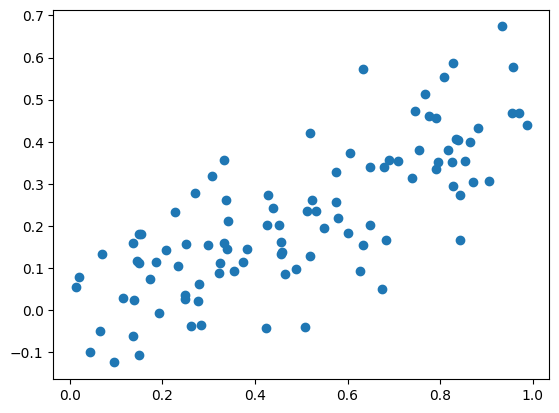

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x1, x2);

In [8]:
from ISLP.models import ModelSpec as MS 
import statsmodels.api as sm

X = MS(["X1", "X2"]).fit_transform(df)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           5.76e-08
Time:                        18:12:06   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
X1             1.6154      0.527      3.065      0.003       0.569       2.661
X2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$X_1$ and $X_2$ are, as expected, highly correlated, with a correlation coefficient of 0.772. This multicollinearity causes instability in the estimated coefficients, making them less reliable. As a result, the model attributes most of the explanatory power to $X_1$, treating it as the only significant predictor, this is reflected in $X_2$'s high p-value of 0.259, which suggests it does not contribute significantly to the model once $X_1$ is included. Although both variables influence $Y$, their redundancy leads to uncertainty in how the effect is divided between them.

In [9]:
X = MS(["X1"]).fit_transform(df)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           1.37e-08
Time:                        18:23:46   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.000       1.562       2.312
X1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X = MS(["X2"]).fit_transform(df)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           7.43e-07
Time:                        18:23:48   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.000       2.019       2.629
X2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both models using only one predictor reject the null hypothesis $H_0: \beta = 0$, indicating that each variable, when considered in isolation, appears to have significant predictive value. In the model using only $X_1$, the estimated slope is $\hat{\beta}_1 = 2.08$ with an intercept of approximately 1.9. In contrast, the model using only $X_2$ yields a slope estimate of $\hat{\beta}_2 = 2.9$ and an intercept near 2.3.

These results don’t contradict each other because when each predictor is considered alone in a univariate regression, it captures not only its own effect but also some of the effect of the other correlated predictor. Since $X_1$ and $X_2$ are highly correlated, each univariate model attributes a larger combined effect to the single predictor, resulting in significant coefficients. However, in the multiple regression including both predictors, the model tries to separate their individual contributions. Due to the high correlation (multicollinearity), the standard errors increase, making it harder to detect the unique effect of $X_2$, which leads to a non-significant coefficient. Thus, the differing significance levels simply reflect how shared information between correlated variables affects coefficient estimates and their uncertainties, rather than any real contradiction.

In [19]:
df.describe()

,X1,X2,Y
count,103.000000,103.000000,103.000000
mean,0.483314,0.237123,3.053251
std,0.276474,0.196319,1.168950
min,0.013037,-0.124132,0.120916
25%,0.249819,0.108511,2.333024
50%,0.457559,0.202125,3.126966
75%,0.742125,0.354944,3.647828
max,0.987124,0.800000,6.000000


In [14]:
x1 = np.concatenate([x1 , [0.1]])
x2 = np.concatenate([x2 , [0.8]])
y = np.concatenate([y, [6]])

df = pd.DataFrame({
    "X1": x1,
    "X2": x2,
    "Y": y
})

The point $(X_1 = 0.1, X_2 = 0.8, Y = 6)$ qualifies as both a high leverage point and an outlier. It is an outlier because its response value $Y = 6$ lies well above the typical range of the data (more than 2.5 standard deviations above the mean). It also has high leverage because its predictor values, especially $X_2 = 0.8$, lie near the extreme end of their respective distributions, and more importantly, the combination $(X_1, X_2)$ deviates from the strong linear pattern observed between these two variables (which are highly correlated). This departure from the main correlation structure makes the point unusual in the predictor space and capable of exerting significant influence on the fitted regression model.

In [15]:
X = MS(["X1", "X2"]).fit_transform(df)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     26.50
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           5.81e-10
Time:                        18:51:56   Log-Likelihood:                -139.82
No. Observations:                 103   AIC:                             285.6
Df Residuals:                     100   BIC:                             293.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1417      0.193     11.115      0.000       1.759       2.524
X1             0.2744      0.403      0.681      0.497      -0.525       1.074
X2             3.2849      0.567      5.791      0.000       2.159       4.410
==============================================================================
Omnibus:                        1.472   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                1.233
Skew:                          -0.069   Prob(JB):                        0.540
Kurtosis:                       2.482   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = MS(["X1"]).fit_transform(df)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     14.73
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           0.000216
Time:                        18:51:56   Log-Likelihood:                -154.72
No. Observations:                 103   AIC:                             313.4
Df Residuals:                     101   BIC:                             318.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3242      0.219     10.633      0.000       1.891       2.758
X1             1.5085      0.393      3.838      0.000       0.729       2.288
==============================================================================
Omnibus:                       15.106   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.254
Skew:                           0.704   Prob(JB):                     2.43e-05
Kurtosis:                       4.724   Cond. No.                         4.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = MS(["X2"]).fit_transform(df)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     52.82
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           7.88e-11
Time:                        18:51:56   Log-Likelihood:                -140.06
No. Observations:                 103   AIC:                             284.1
Df Residuals:                     101   BIC:                             289.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2259      0.148     15.091      0.000       1.933       2.518
X2             3.4893      0.480      7.268      0.000       2.537       4.442
==============================================================================
Omnibus:                        1.164   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                1.074
Skew:                          -0.073   Prob(JB):                        0.584
Kurtosis:                       2.522   Cond. No.                         5.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The inclusion of the new observation $(X_1 = 0.1, X_2 = 0.8, Y = 6)$ has a noticeable effect on all regression models. In the model with both $X_1$ and $X_2$, the coefficients shift substantially: the estimated coefficient for $X_1$ drops to 0.27 and becomes statistically insignificant (p = 0.497), while $X_2$'s coefficient inflates to 3.28 with strong significance. This shift suggests that the new point pulls the model toward relying more heavily on $X_2$, likely because it is extreme in $X_2$ and $Y$, and consistent with the influence expected from a high-leverage, outlier point. In the model using only $X_1$, the new observation causes a reduction in R-squared from earlier values indicating a poor model fit. Conversely, in the model using only $X_2$, the R-squared remains high (0.343), and the fit remains stable and significant, suggesting that the point aligns better with the linear pattern in the $X_2$-only model. Overall, the new observation inflates the importance of $X_2$ while undermining the explanatory power of $X_1$, confirming the sensitivity of linear regression to influential points.